# Persiapan Dataset

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

datasetFaces = []
target = []

for person in range(1, 41):
    for pose in range(1, 11):
        file_path = f"/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/archive/s{person}/{pose}.pgm"
        if os.path.exists(file_path):  # Pastikan path file ada sebelum membaca
            datasetFaces.append(plt.imread(file_path))
            target.append(person)

datasetFaces = np.array(datasetFaces)
target = np.array(target)

print('Jumlah total dataset:', len(datasetFaces))
print('Jumlah total target:', len(target))
print('Ukuran dataset:', datasetFaces.shape)

Jumlah total dataset: 400
Jumlah total target: 400
Ukuran dataset: (400, 112, 92)


In [ ]:
# Visualisasi semua datasets Person
fig, axes = plt.subplots(40, 10, figsize=(20, 40))

for person in range(40):
    for pose in range(10):
        axes[person, pose].imshow(datasetFaces[person*10+pose], cmap='gray')
        axes[person, pose].axis('off')
        axes[person, pose].set_title(f'Person {person + 1}\nPose {pose + 1}', fontsize=8)

plt.tight_layout()
plt.show()

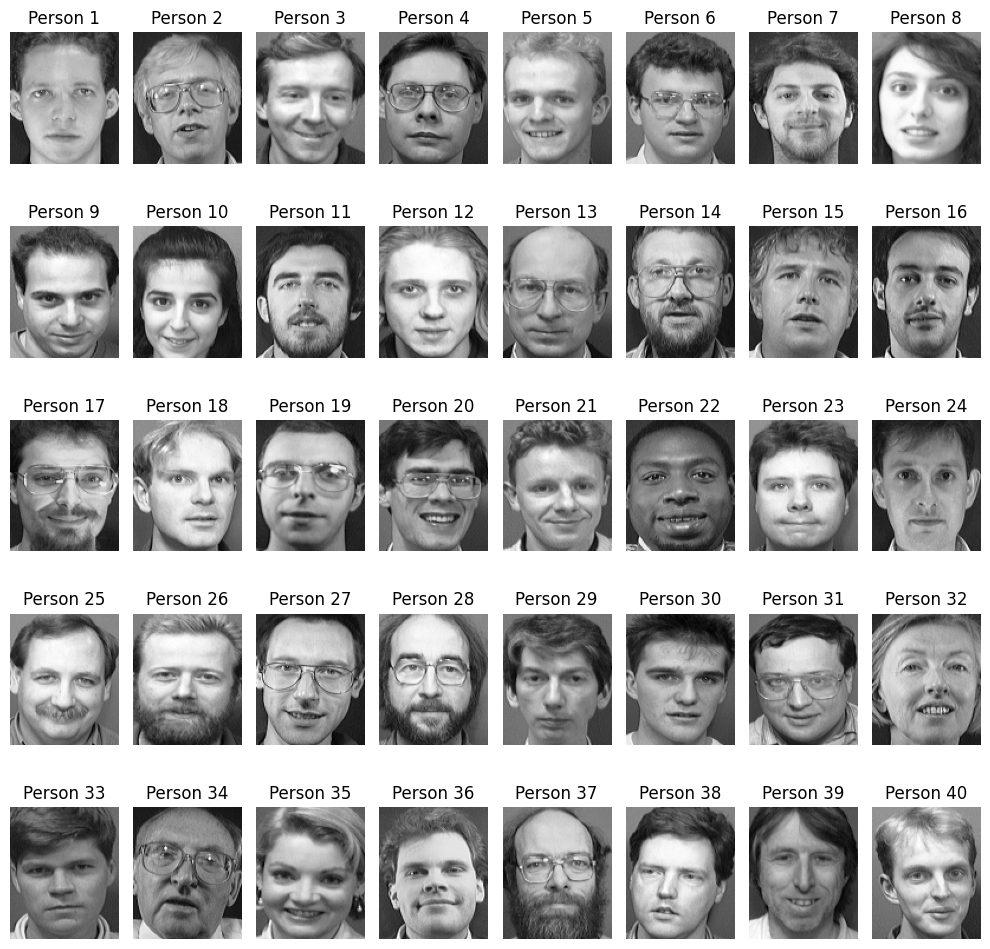

In [ ]:
# Visualisasi Person
plt.figure(figsize=(10,10))

for person in range(40):
    plt.subplot(5, 8, person+1)
    plt.imshow(datasetFaces[person*10], cmap='gray')
    plt.title('Person '+str(person+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import os
import numpy as np

# Fungsi untuk membaca dan memproses dataset citra wajah
def read_faces_dataset():
    dataset_faces = []
    target = []

    for person in range(1, 41):
        for pose in range(1, 11):
            file_path = f"/content/drive/MyDrive/Pengolahan Citra/Dataset Wajah/archive/s{person}/{pose}.pgm"
            if os.path.exists(file_path):
                dataset_faces.append(np.array(Image.open(file_path)))
                target.append(person)

    dataset_faces = np.array(dataset_faces)
    target = np.array(target)

    return dataset_faces, target

In [ ]:
# Membaca dataset citra
dataset, target = read_faces_dataset()

In [ ]:
# Fungsi untuk membagi data menjadi data latih dan data uji
def split_train_test_data(dataset, target):
    # Mengambil setiap gambar kedua sebagai data uji dan sisanya sebagai data latih
    training_set = dataset[::2]
    test_set = dataset[1::2]

    training_labels = target[::2]
    test_labels = target[1::2]

    return training_set, test_set, training_labels, test_labels

In [ ]:
training_set, test_set, training_labels, test_labels= split_train_test_data(dataset, target)

PCA

In [ ]:
# Mengubah kumpulan gambar ke dalam vektor 1D
num_samples, width, height = training_set.shape
training_set1 = training_set.reshape((num_samples, width * height))
test_set1= test_set.reshape((test_set.shape[0], -1))

In [ ]:
def algoritma_eigenface(training_set, test_set, alpha_value):
    # menghitung rata-rata dari setiap piksel di seluruh dataset latihan
    means = np.mean(training_set, axis=0)

    # Normalisasi dataset latihan dan uji
    centered_training_set = training_set - means
    centered_test_set = test_set - means

    # Menghitung matriks kovarians
    covariance_matrix = np.cov(centered_training_set.T, bias=True)

    # Menghitung nilai dan vektor eigen dari matriks kovarians
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Mengurutkan nilai dan vektor eigen
    positions = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = eigenvalues[positions]
    sorted_eigenvectors = eigenvectors[:, positions]

    # Mendapatkan jumlah komponen utama dengan menghitung kontribusi kumulatif
    total = np.sum(sorted_eigenvalues)
    cumulative_sum = np.cumsum(sorted_eigenvalues)
    r = np.searchsorted(cumulative_sum, alpha_value * total)

    # Mendapatkan matriks proyeksi dengan komponen utama yang dipilih
    projection_matrix = sorted_eigenvectors[:, :r]

    # Menghitung bobot dari data latih dan uji dengan matriks proyeksi PCA
    bobot_training = np.dot(training_set, projection_matrix)  # Bobot data latih
    bobot_test = np.dot(test_set, projection_matrix)  # Bobot data uji

    return sorted_eigenvalues, sorted_eigenvectors,projection_matrix, bobot_training, bobot_test,  centered_training_set

In [ ]:
alpha_value = 0.80
sorted_eigenvalues, sorted_eigenvectors,projection_matrix, bobot_training, bobot_test,  centered_training_set= algoritma_eigenface(training_set1, test_set1, alpha_value)

In [ ]:
# Mengaplikasikan proyeksi PCA ke dataset latih dan uji
pca_training = np.dot(training_set1, projection_matrix)
pca_test = np.dot(test_set1, projection_matrix)

In [ ]:
# Periksa dimensi aktual setelah PCA
print("Dimensi pca_training setelah PCA:", pca_training.shape)
print("Dimensi pca_test setelah PCA:", pca_test.shape)

Dimensi pca_training setelah PCA: (200, 35)
Dimensi pca_test setelah PCA: (200, 35)


In [ ]:
print("Dimensi pca_training setelah PCA:", sorted_eigenvectors.shape)

Dimensi pca_training setelah PCA: (10304, 10304)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

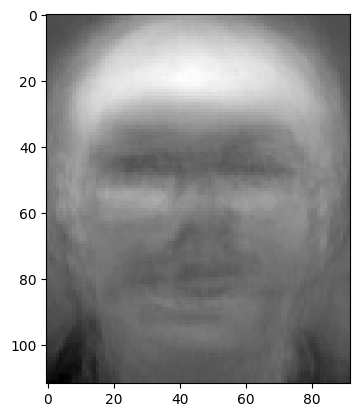

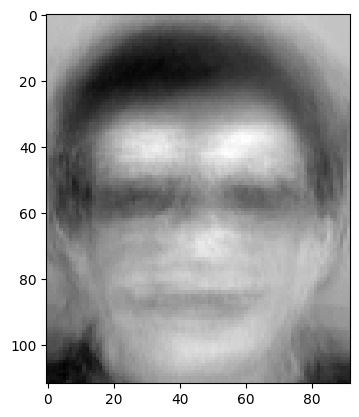

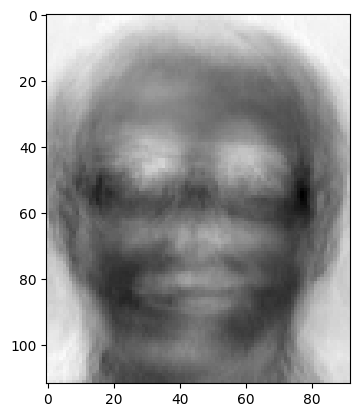

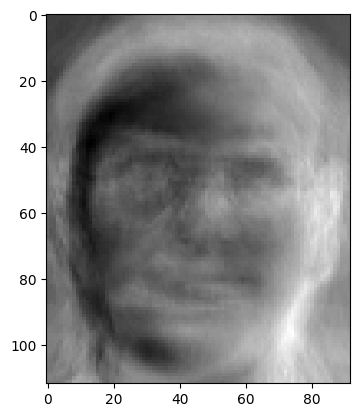

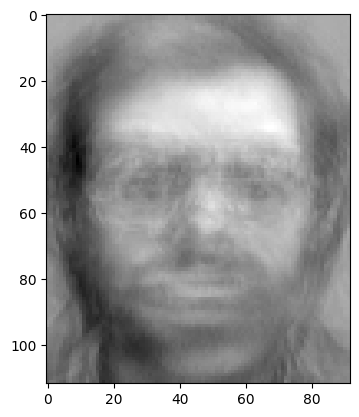

In [ ]:
for i in range(5):
    plt.imshow(sorted_eigenvectors[:,i].reshape(112,92),cmap='gray')
    plt.show()

In [ ]:
print(training_set)

[[[ 48  49  45 ...  56  56  54]
  [ 45  52  39 ...  52  50  51]
  [ 45  50  42 ...  48  53  50]
  ...
  [ 50  48  50 ...  45  46  46]
  [ 45  54  49 ...  46  47  47]
  [ 51  51  51 ...  47  46  46]]

 [[ 39  44  53 ...  47  48  47]
  [ 44  44  61 ...  47  45  46]
  [ 59  39  57 ...  46  46  44]
  ...
  [ 49  46  42 ...  30  32  28]
  [ 46  35  34 ...  30  29  27]
  [ 32  37  27 ...  29  26  29]]

 [[ 64  76  80 ...  52  54  52]
  [ 60  61  60 ...  52  53  51]
  [ 63  80  79 ...  53  52  59]
  ...
  [ 21  22  12 ...  37  42  35]
  [ 19  20   7 ...  42  35  42]
  [ 24  14  11 ...  35  37  39]]

 ...

 [[128 125 125 ... 121 122 121]
  [129 127 128 ... 125 121 125]
  [126 126 131 ... 124 124 125]
  ...
  [ 71  65  90 ...  90  86  90]
  [ 72  75  99 ...  86  88  91]
  [ 63  87 100 ...  85  90  84]]

 [[129 127 133 ... 122 124 124]
  [130 128 126 ... 123 124 122]
  [127 126 132 ... 123 123 126]
  ...
  [ 69  72  71 ...  90  90  95]
  [ 70  69  71 ...  92  93  92]
  [ 74  69  72 ...  93  93  

In [ ]:
print(bobot_training)

[[ 9.14905864e+03  8.25950159e+03 -1.99773818e+03 ...  2.33388773e+02
  -1.05384671e+02 -1.88896546e+02]
 [ 1.03125681e+04  7.53919419e+03 -1.12352193e+03 ...  8.60123140e+02
   3.08542999e+01 -4.69384528e+02]
 [ 1.12404631e+04  7.92525505e+03 -2.27715084e+02 ...  3.55525502e+02
  -2.30001042e+01  1.87826296e+02]
 ...
 [ 8.74107599e+03  8.59546047e+03  9.16372098e+02 ...  2.53139865e+02
   3.61198126e+02 -6.83411186e+00]
 [ 8.67731913e+03  8.32377822e+03  1.03332515e+03 ...  2.86264117e+02
  -1.00806924e+00 -1.35472271e+02]
 [ 8.97689926e+03  8.33542296e+03  8.02515274e+02 ... -3.82986324e+00
  -1.64925536e+02  1.27021065e+02]]


In [ ]:
print(training_labels)

[ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40 40 40 40]


In [ ]:
import numpy as np

def lda_processing(bobot_training_pca, training_labels):
    unique_classes = np.unique(training_labels)
    class_means = []

    for cls in unique_classes:
        class_data = bobot_training_pca[training_labels == cls]
        if len(class_data) > 0:
            class_mean = np.mean(class_data, axis=0)
            class_means.append(class_mean)
        else:
            print(f"No data for class {cls}.")

    if len(class_means) == 0:
        return None, None

    class_means = np.array(class_means)
    overall_mean = np.mean(bobot_training_pca, axis=0)

    Sb = np.dot((class_means - overall_mean).T, (class_means - overall_mean))

    # Sw = np.zeros((bobot_training_pca.shape[1], bobot_training_pca.shape[1]))
    Sw = np.dot((bobot_training_pca.shape[1]-class_means).T, (bobot_training_pca.shape[1]-class_means))

    for cls in unique_classes:
        class_data = bobot_training_pca[training_labels == cls]
        class_mean = class_means[np.where(unique_classes == cls)][0]
        if len(class_data) > 0:
            class_scatter = np.dot((class_data - class_mean).T, (class_data - class_mean))
            Sw += class_scatter

    Sw_projected = np.dot(np.linalg.inv(Sw), Sb)

    eigenvalues_lda, eigenvectors_lda = np.linalg.eigh(Sw_projected)

    positions_lda = eigenvalues_lda.argsort()[::-1]
    sorted_eigenvalues_lda = eigenvalues_lda[positions_lda]
    sorted_eigenvectors_lda = eigenvectors_lda[:, positions_lda]

    k = len(unique_classes)
    new_space_lda = sorted_eigenvectors_lda[:, :k - 1]

    # Proyeksi ke ruang LDA
    projected_faces = np.dot(bobot_training_pca, new_space_lda)

    return projected_faces, new_space_lda, sorted_eigenvectors_lda



In [ ]:
projected_faces, new_space_lda, sorted_eigenvectors_lda = lda_processing(bobot_training, training_labels)

In [ ]:
ukuran_gambar = sorted_eigenvectors_lda[:, 0].shape
print(f"Ukuran gambar: {ukuran_gambar}")

Ukuran gambar: (35,)


In [ ]:
# Periksa dimensi aktual setelah LDA
print("Dimensi projected_faces setelah LDA:", projected_faces.shape)

Dimensi projected_faces setelah LDA: (200, 35)


In [ ]:
print("Dimensi lda_training setelah lda:", sorted_eigenvectors_lda.shape)

Dimensi lda_training setelah lda: (35, 35)


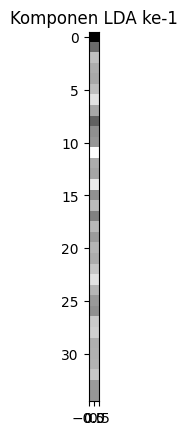

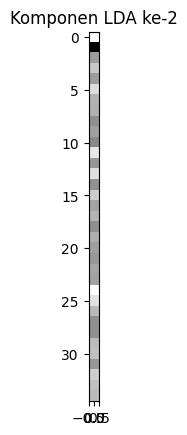

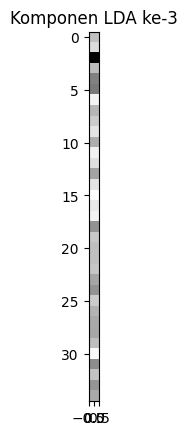

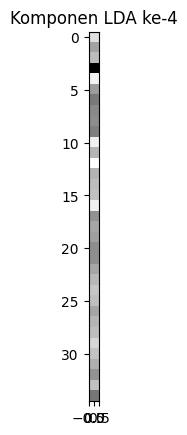

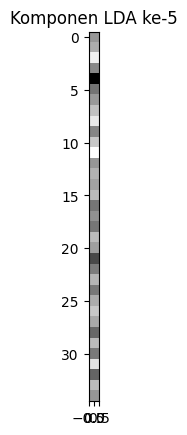

In [ ]:
width = 35 # Ganti dengan lebar gambar asli
height = 1 # Ganti dengan tinggi gambar asli

for i in range(5):
    plt.imshow(sorted_eigenvectors_lda[:, i].reshape(width, height), cmap='gray')
    plt.title(f"Komponen LDA ke-{i+1}")
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Misalnya, dengan menggunakan k tetangga terdekat
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Melatih model KNN pada data yang telah direduksi
knn_classifier.fit(projected_faces, training_labels)

# Melakukan prediksi pada data uji setelah reduksi dimensi
projected_test_faces = np.dot(bobot_test, new_space_lda)
predicted_labels = knn_classifier.predict(projected_test_faces)

# Evaluasi performa model (contohnya, menghitung akurasi)
accuracy = np.mean(predicted_labels == test_labels)
print(f"Akurasi KNN setelah reduksi dimensi: {accuracy * 100:.2f}%")


Akurasi KNN setelah reduksi dimensi: 95.00%


In [ ]:
predicted_labels

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5, 40,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10,  8, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 21, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 37, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       25, 15, 35, 25, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40,  5,  5, 40,  5])

In [ ]:
print(test_labels)

[ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40 40 40 40]


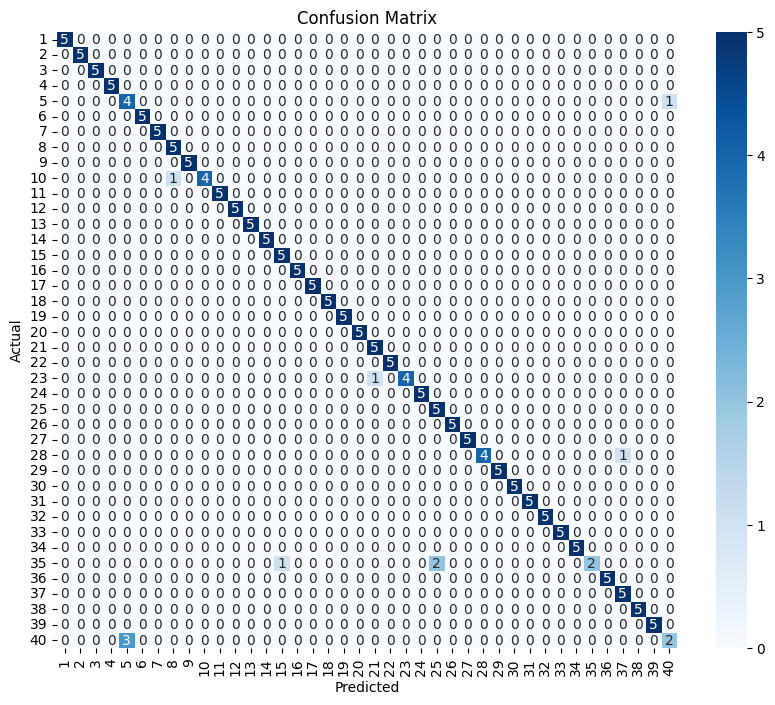

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Menampilkan hasil tes
print("Label Sebenarnya - Prediksi")
for true_label, predicted_label in zip(test_labels, predicted_labels):
    print(f"{true_label} - {predicted_label}")

# Menghitung jumlah prediksi yang benar
correct_predictions = np.sum(predicted_labels == test_labels)
total_samples = len(test_labels)
accuracy_percentage = (correct_predictions / total_samples) * 100

print(f"\nJumlah prediksi benar: {correct_predictions} dari {total_samples} sampel")
print(f"Akurasi: {accuracy_percentage:.2f}%")

Label Sebenarnya - Prediksi
1 - 1
1 - 1
1 - 1
1 - 1
1 - 1
2 - 2
2 - 2
2 - 2
2 - 2
2 - 2
3 - 3
3 - 3
3 - 3
3 - 3
3 - 3
4 - 4
4 - 4
4 - 4
4 - 4
4 - 4
5 - 5
5 - 5
5 - 5
5 - 5
5 - 40
6 - 6
6 - 6
6 - 6
6 - 6
6 - 6
7 - 7
7 - 7
7 - 7
7 - 7
7 - 7
8 - 8
8 - 8
8 - 8
8 - 8
8 - 8
9 - 9
9 - 9
9 - 9
9 - 9
9 - 9
10 - 10
10 - 10
10 - 10
10 - 10
10 - 8
11 - 11
11 - 11
11 - 11
11 - 11
11 - 11
12 - 12
12 - 12
12 - 12
12 - 12
12 - 12
13 - 13
13 - 13
13 - 13
13 - 13
13 - 13
14 - 14
14 - 14
14 - 14
14 - 14
14 - 14
15 - 15
15 - 15
15 - 15
15 - 15
15 - 15
16 - 16
16 - 16
16 - 16
16 - 16
16 - 16
17 - 17
17 - 17
17 - 17
17 - 17
17 - 17
18 - 18
18 - 18
18 - 18
18 - 18
18 - 18
19 - 19
19 - 19
19 - 19
19 - 19
19 - 19
20 - 20
20 - 20
20 - 20
20 - 20
20 - 20
21 - 21
21 - 21
21 - 21
21 - 21
21 - 21
22 - 22
22 - 22
22 - 22
22 - 22
22 - 22
23 - 21
23 - 23
23 - 23
23 - 23
23 - 23
24 - 24
24 - 24
24 - 24
24 - 24
24 - 24
25 - 25
25 - 25
25 - 25
25 - 25
25 - 25
26 - 26
26 - 26
26 - 26
26 - 26
26 - 26
27 - 27
27 - 27
27 - 2

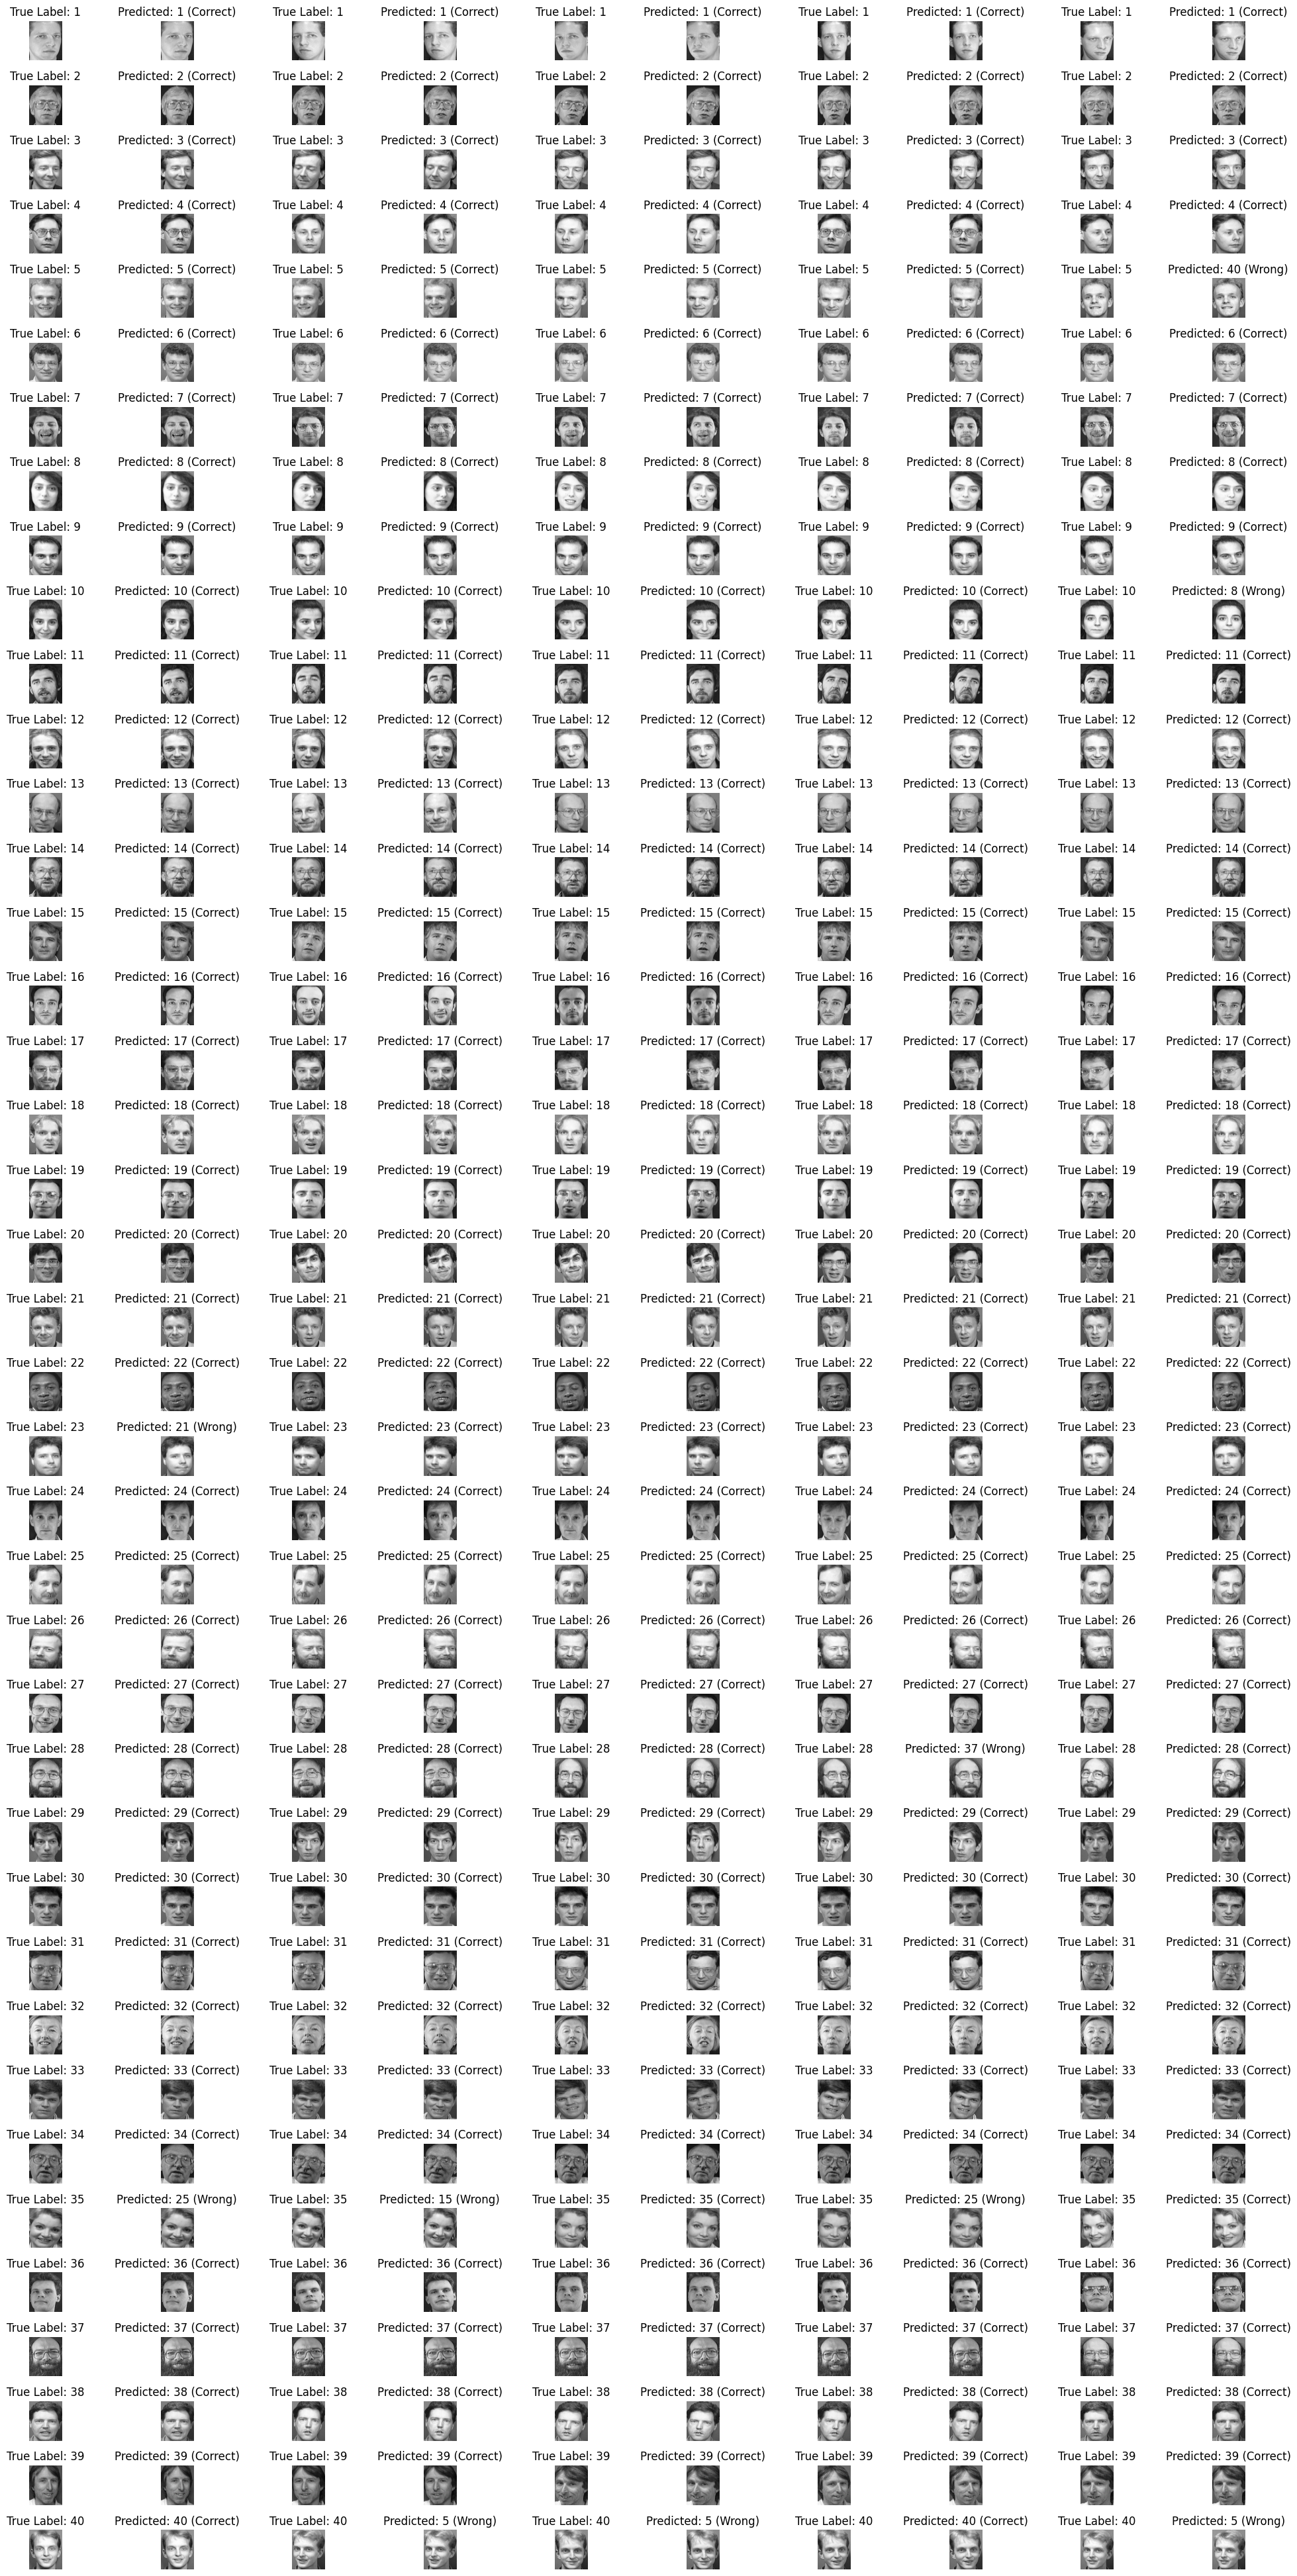

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dan label prediksi
def display_results(images, true_labels, predicted_labels):
    num_samples = len(images)
    num_cols = 5  # Jumlah kolom gambar
    num_rows = num_samples // num_cols + 1 # Hitung jumlah baris sesuai jumlah sampel

    plt.figure(figsize=(20, 40))
    for i in range(num_samples):
        plt.subplot(num_rows, 2*num_cols, 2*i + 1)
        plt.imshow(images[i].reshape(112, 92), cmap='gray')
        plt.title(f"True Label: {true_labels[i]}")
        plt.axis('off')

        plt.subplot(num_rows, 2*num_cols, 2*i + 2)
        if true_labels[i] == predicted_labels[i]:
            plt.imshow(images[i].reshape(112, 92), cmap='gray')
        else:
            plt.imshow(test_set[i].reshape(112, 92), cmap='gray')
        if true_labels[i] == predicted_labels[i]:
            plt.title(f"Predicted: {predicted_labels[i]} (Correct)")
        else:
            plt.title(f"Predicted: {predicted_labels[i]} (Wrong)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Menampilkan hasil dari beberapa sampel data uji
num_samples_to_display = 200
display_results(test_set[:num_samples_to_display], test_labels[:num_samples_to_display], predicted_labels[:num_samples_to_display])